In [12]:
import numpy as np
import pandas as pd
import sys
import os
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sys.path.append('..')
from helper import *

setwd()

In [14]:
con = duckdb.connect(database="data/exploitation.db", read_only=True)
df = con.execute("SELECT * FROM sandbox_T_apartment_S_ca").fetchdf()
con.close

<bound method PyCapsule.close of <duckdb.DuckDBPyConnection object at 0x7f3cd4425ab0>>

In [15]:
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,hospital_type_children,government_hospital,nonprofit_hospital,private_hospital,num_schools,num_students,preschool,elementary_school,middle_school,high_school
0,7045870715,https://bakersfield.craigslist.org/apa/d/baker...,bakersfield,https://bakersfield.craigslist.org,1020.0,apartment,1009.0,2,1.0,No,...,0.0,8.0,40.0,40.0,1488,1198000.0,912.0,288.0,240.0,32.0
1,7044899027,https://bakersfield.craigslist.org/apa/d/baker...,bakersfield,https://bakersfield.craigslist.org,975.0,apartment,849.0,2,1.0,Yes,...,0.0,161.0,966.0,805.0,33810,26667718.0,20125.0,6279.0,5957.0,966.0
2,7045181047,https://bakersfield.craigslist.org/apa/d/baker...,bakersfield,https://bakersfield.craigslist.org,975.0,apartment,849.0,2,1.0,Yes,...,0.0,161.0,966.0,805.0,33810,26667718.0,20125.0,6279.0,5957.0,966.0
3,7044719189,https://bakersfield.craigslist.org/apa/d/baker...,bakersfield,https://bakersfield.craigslist.org,975.0,apartment,849.0,2,1.0,Yes,...,0.0,161.0,966.0,805.0,33810,26667718.0,20125.0,6279.0,5957.0,966.0
4,7049087979,https://bakersfield.craigslist.org/apa/d/baker...,bakersfield,https://bakersfield.craigslist.org,1015.0,apartment,820.0,2,1.0,No,...,0.0,23.0,115.0,115.0,4347,3492205.0,2645.0,828.0,736.0,92.0


In [16]:
numeric_description(df)

,mean,std,min,25%,50%,75%,max,missings,missing ratio (%)
id,7.043617e+09,7.678639e+06,7.004627e+09,7.040167e+09,7.046563e+09,7.049414e+09,7.050110e+09,0.0,0.00
price,3.036520e+03,1.461503e+05,1.000000e+00,1.315000e+03,1.675000e+03,2.150000e+03,2.170191e+07,259.0,0.95
sqfeet,8.912317e+02,8.441264e+02,1.000000e+00,7.000000e+02,8.600000e+02,1.030000e+03,9.524200e+04,69.0,0.25
beds,1.650216e+00,7.520621e-01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00,0.0,0.00
baths,1.424636e+00,5.286821e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,0.0,0.00
lat,3.592446e+01,2.123666e+00,3.234960e+01,3.403530e+01,3.560750e+01,3.778920e+01,4.553430e+01,0.0,0.00
long,-1.194733e+02,1.806714e+00,-1.242030e+02,-1.212680e+02,-1.196520e+02,-1.179133e+02,-7.237180e+01,0.0,0.00
num_hospitals,1.301928e+03,1.813045e+03,0.000000e+00,1.610000e+02,6.000000e+02,1.776000e+03,1.391000e+04,0.0,0.00
num_beds,2.377631e+05,3.641523e+05,2.600000e+01,2.926300e+04,1.003800e+05,2.937530e+05,3.035240e+06,3.0,0.01
hospital_type_general,1.001935e+03,1.438659e+03,0.000000e+00,1.240000e+02,4.320000e+02,1.235000e+03,1.092000e+04,0.0,0.00


In [17]:
description_categorical(df)

,,#Levels,"Max Freq (Abs,%)","Min Freq (Abs,%)",#Unknows,Unknows (%)
0,url,27314,https://yubasutter.craigslist.org/apa/d/yuba-c...,https://bakersfield.craigslist.org/apa/d/1-bed...,0,0.00
1,region,29,"stockton (2396, 8.77)","susanville (6, 0.02)",0,0.00
2,region_url,29,"https://stockton.craigslist.org (2396, 8.77)","https://susanville.craigslist.org (6, 0.02)",0,0.00
3,type,1,"apartment (27314, 100.0)","apartment (27314, 100.0)",0,0.00
4,cats_allowed,2,"Yes (19837, 72.63)","No (7477, 27.37)",0,0.00
5,dogs_allowed,2,"Yes (18978, 69.48)","No (8336, 30.52)",0,0.00
6,smoking_allowed,2,"Yes (19876, 72.77)","No (7438, 27.23)",0,0.00
7,wheelchair_access,2,"No (24535, 89.83)","Yes (2779, 10.17)",0,0.00
8,electric_vehicle_charge,2,"No (25903, 94.83)","Yes (1411, 5.17)",0,0.00
9,comes_furnished,2,"No (26632, 97.5)","Yes (682, 2.5)",0,0.00


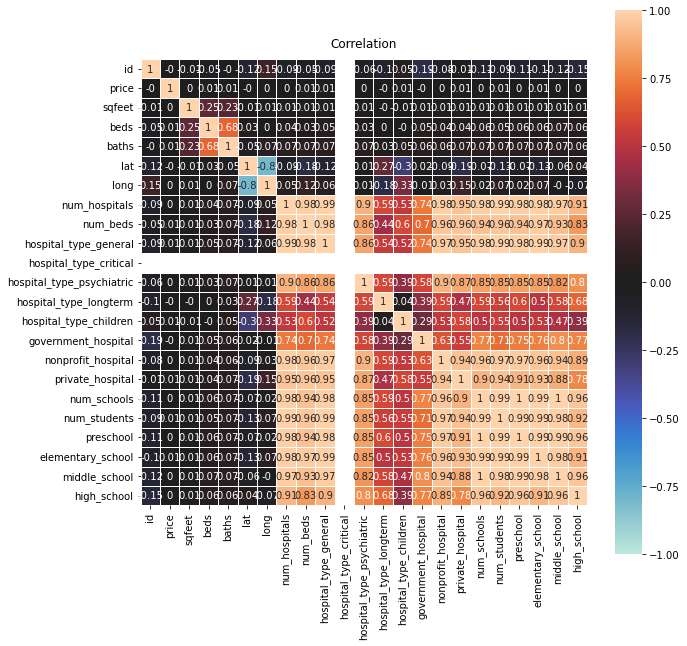

In [18]:
correlation(df)

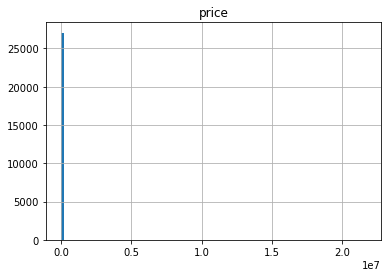

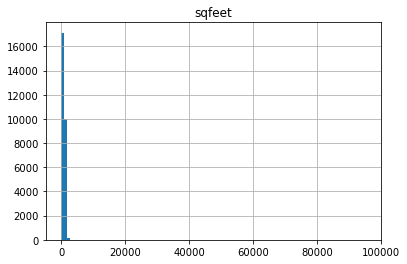

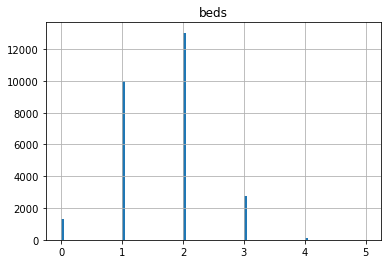

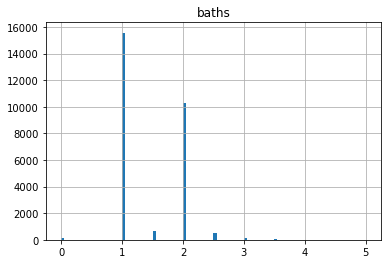

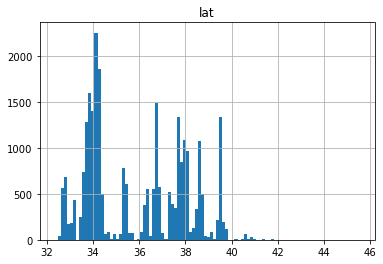

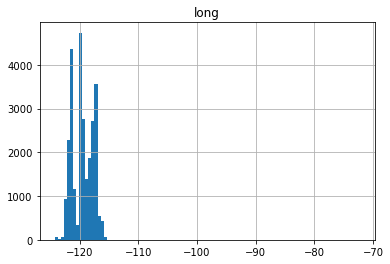

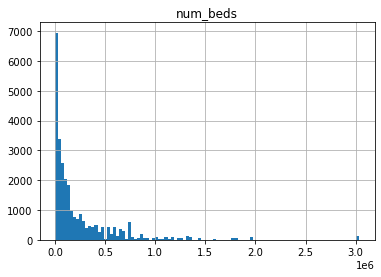

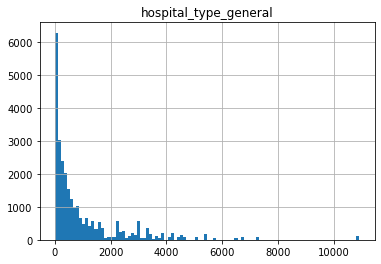

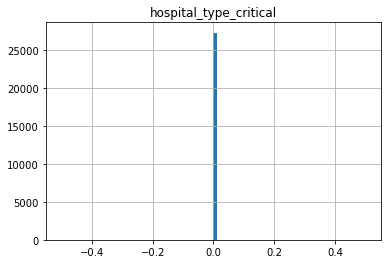

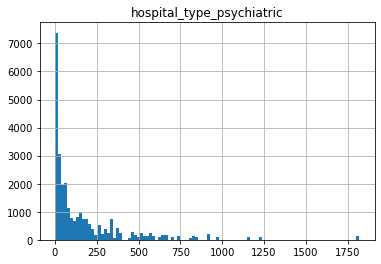

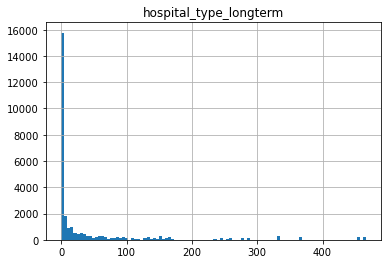

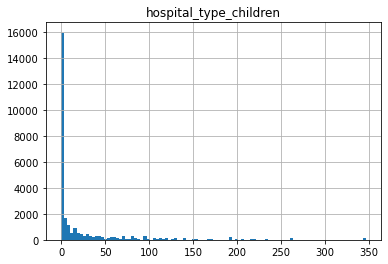

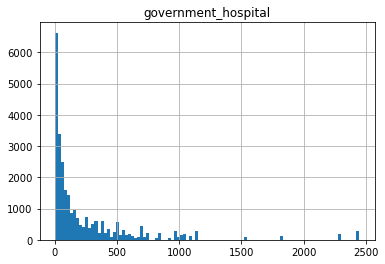

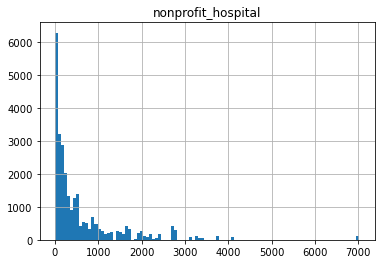

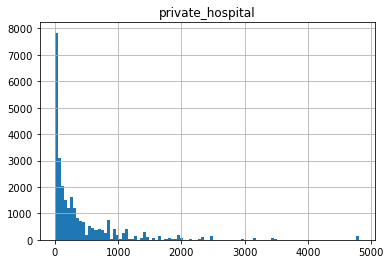

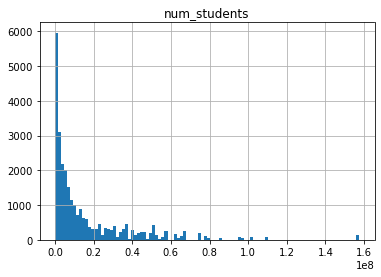

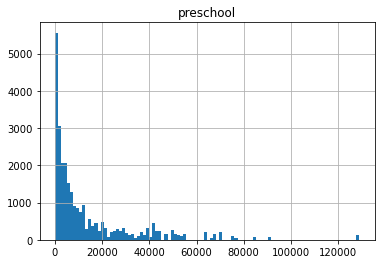

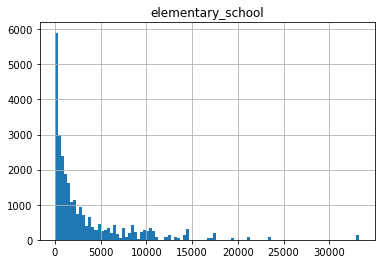

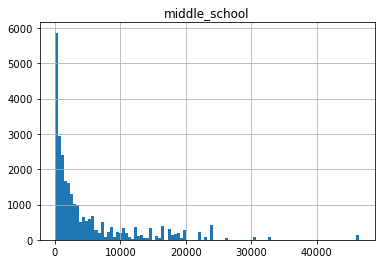

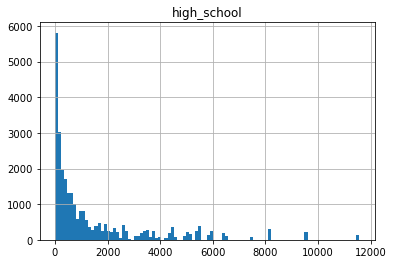

In [19]:
hist(df, bins=100)

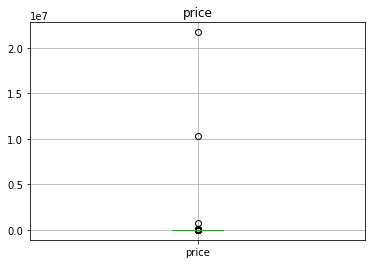

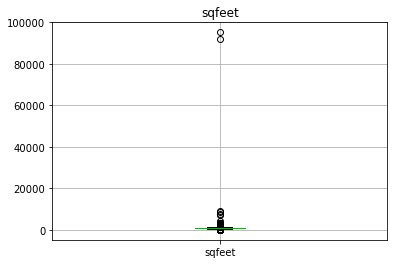

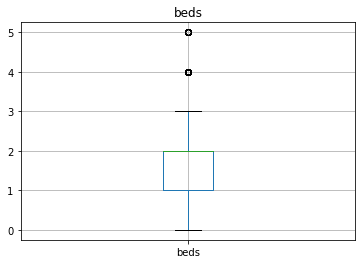

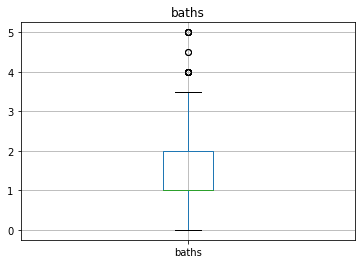

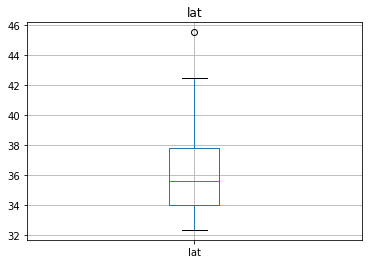

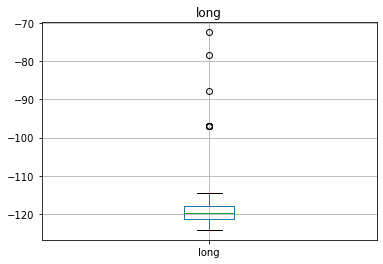

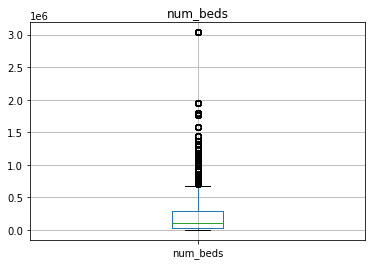

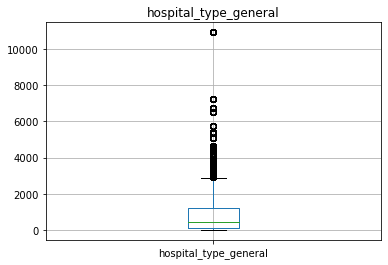

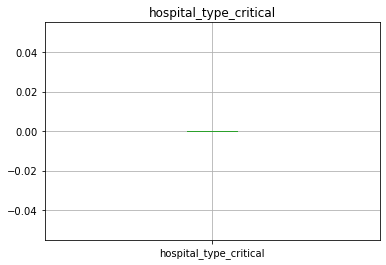

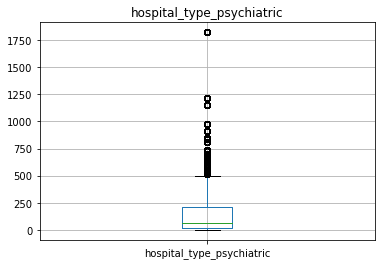

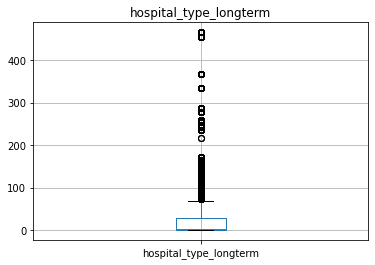

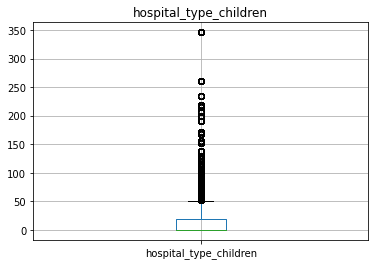

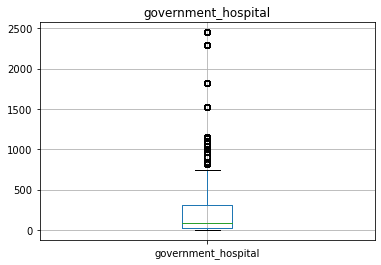

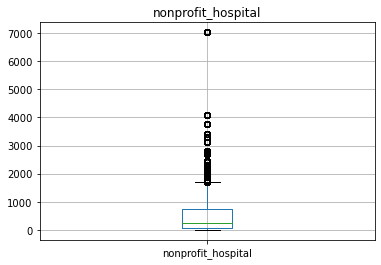

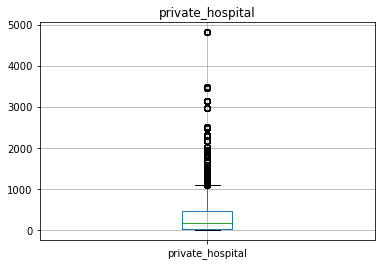

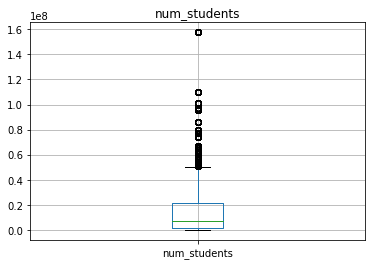

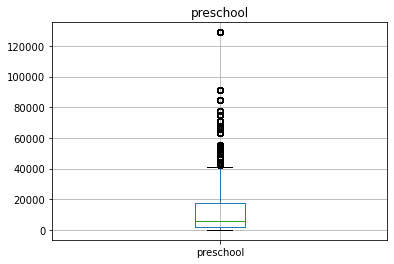

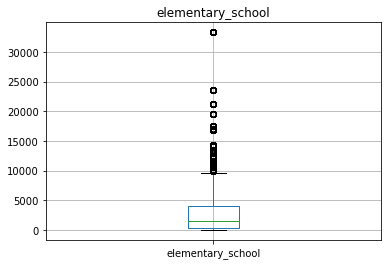

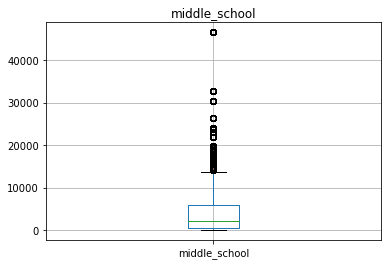

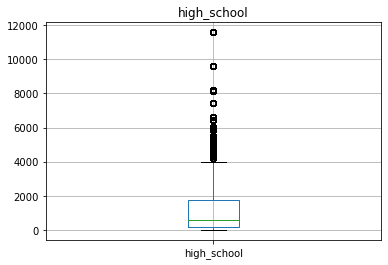

In [20]:
boxplot(df)

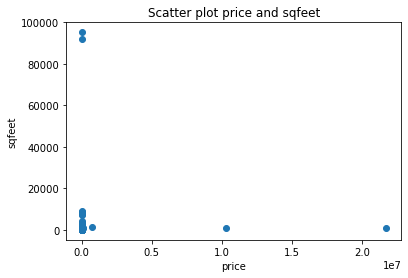

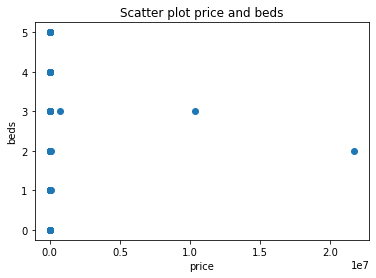

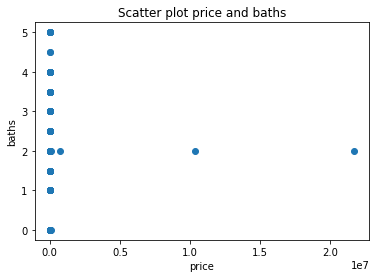

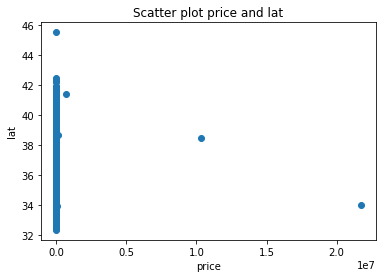

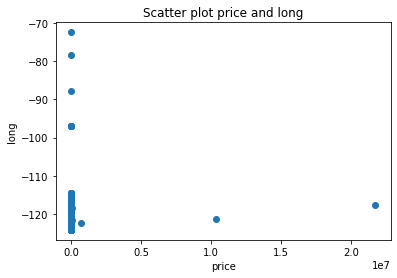

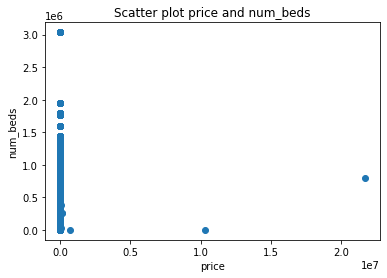

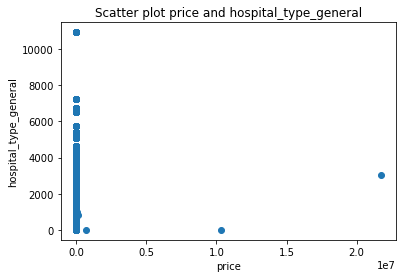

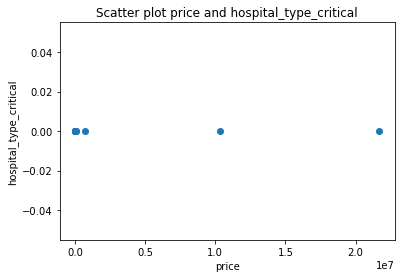

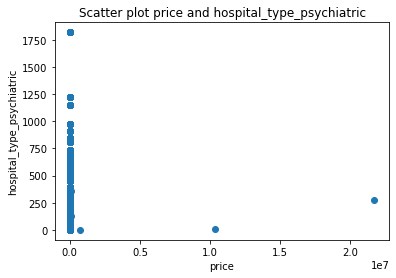

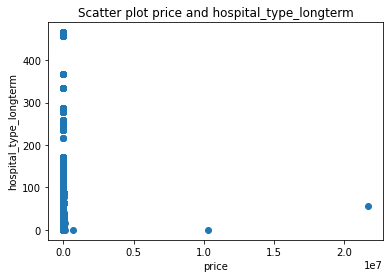

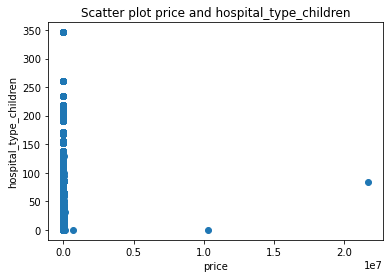

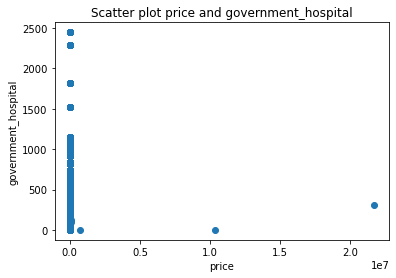

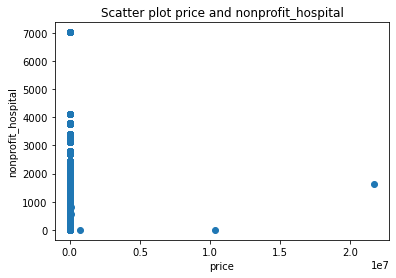

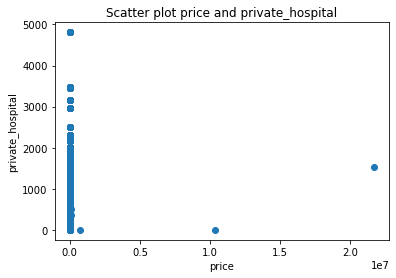

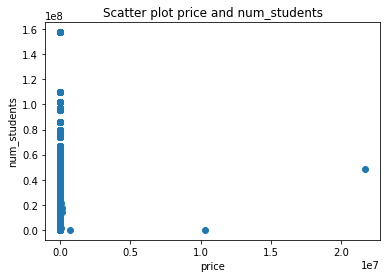

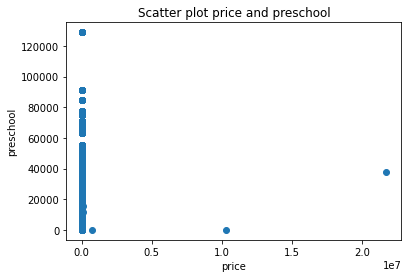

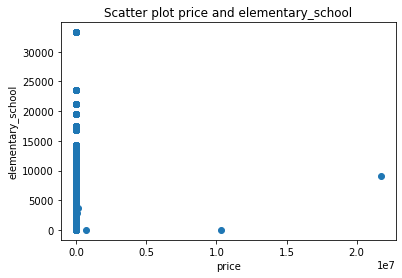

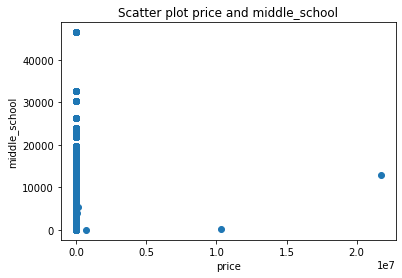

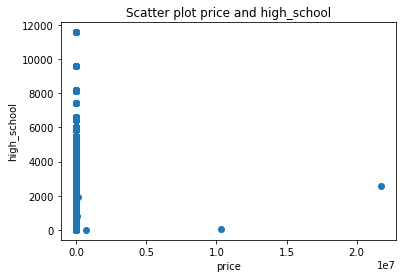

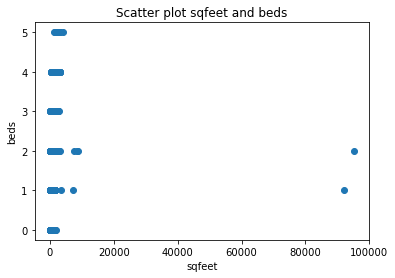

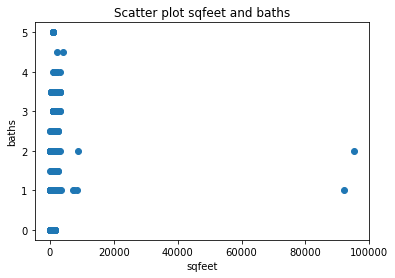

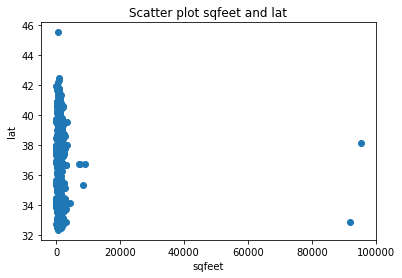

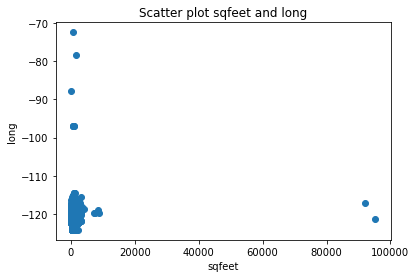

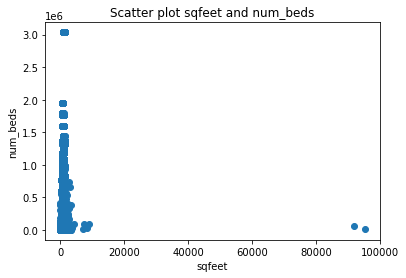

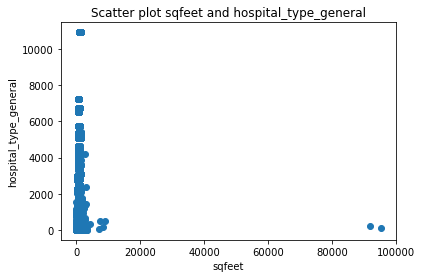

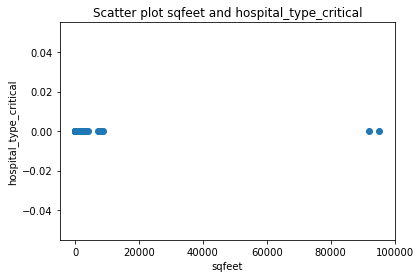

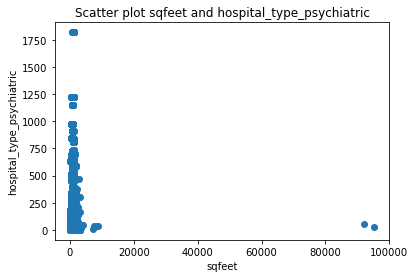

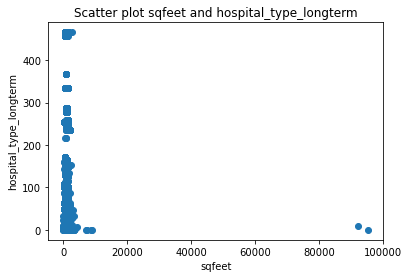

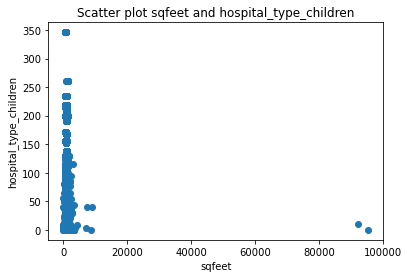

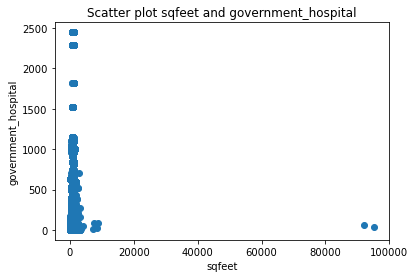

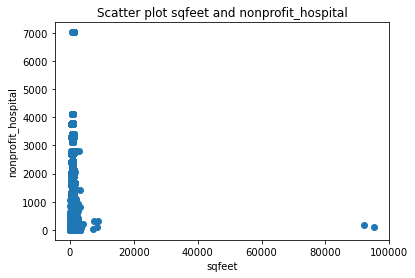

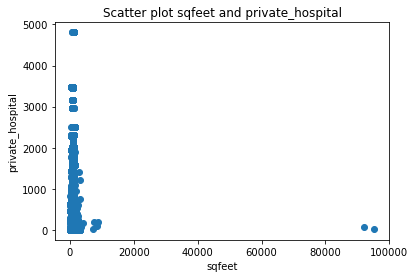

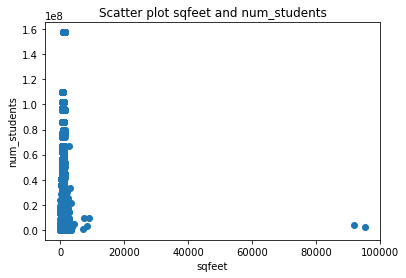

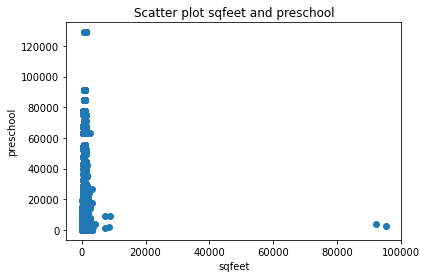

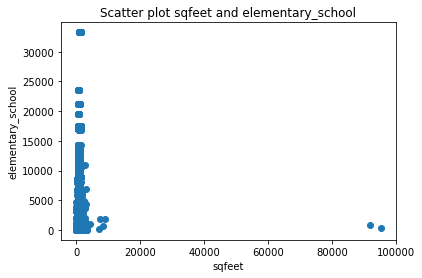

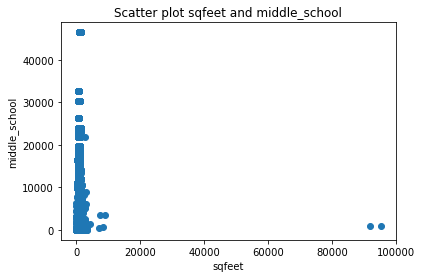

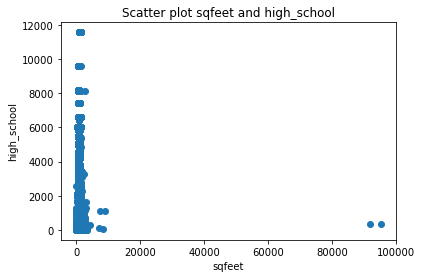

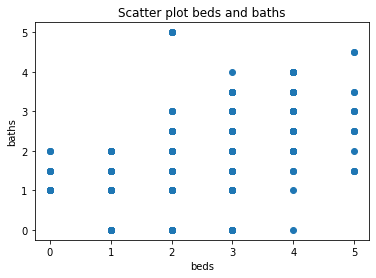

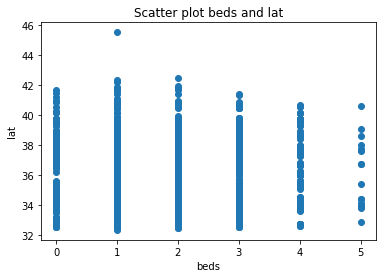

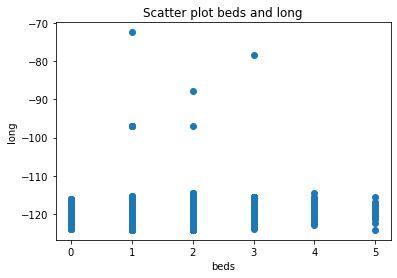

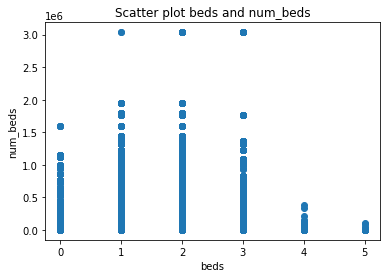

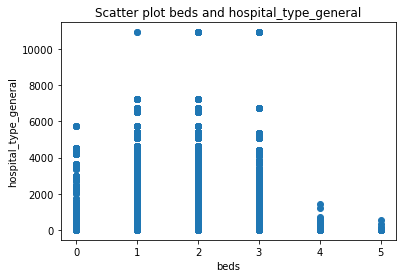

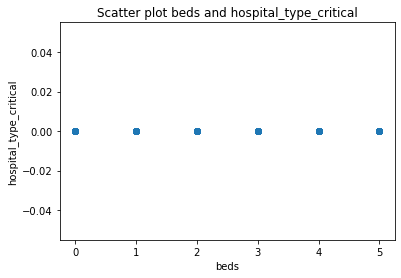

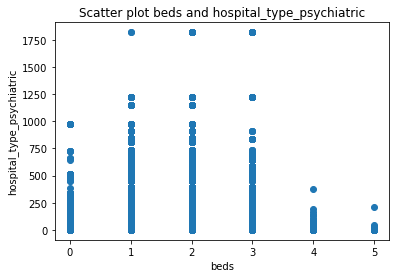

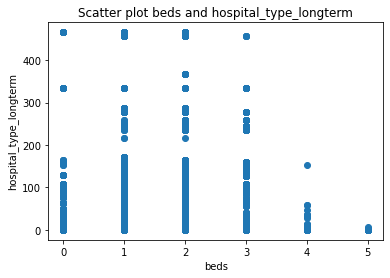

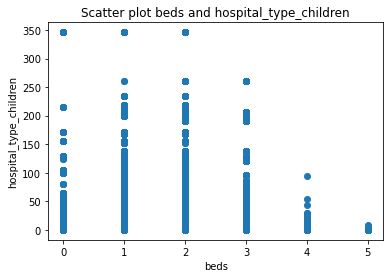

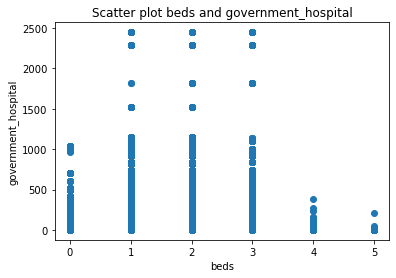

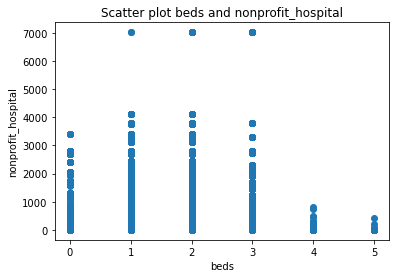

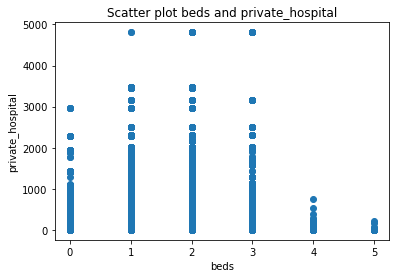

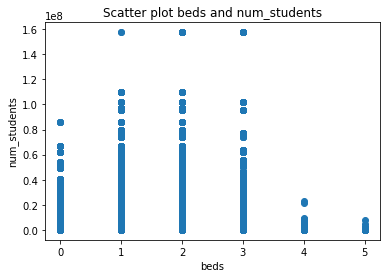

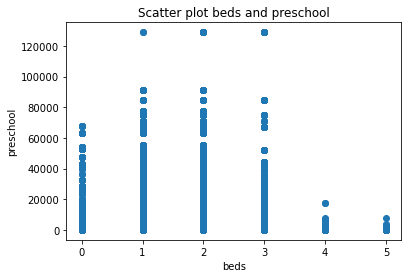

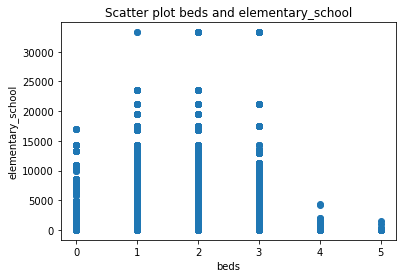

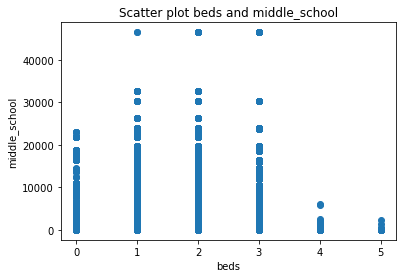

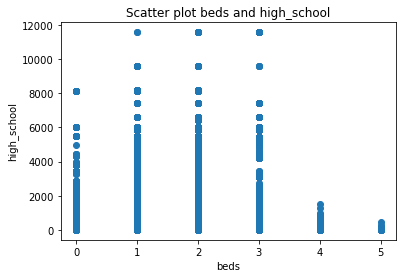

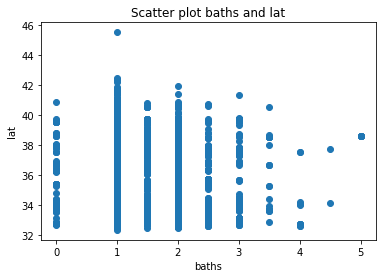

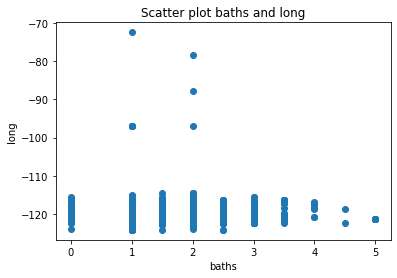

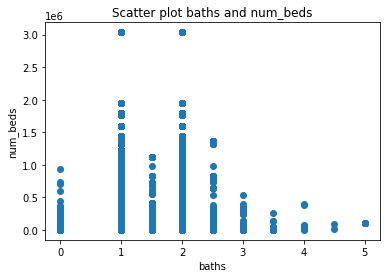

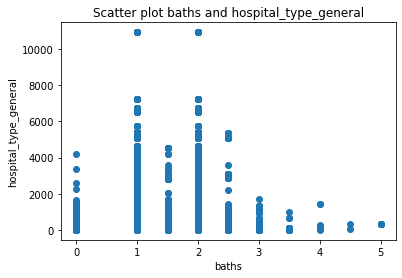

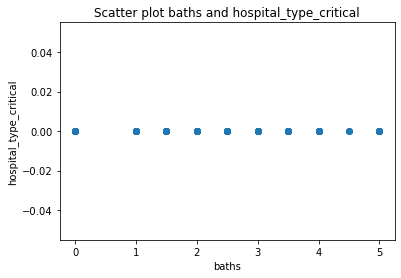

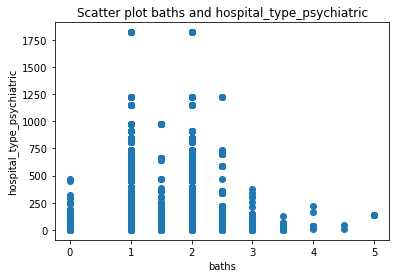

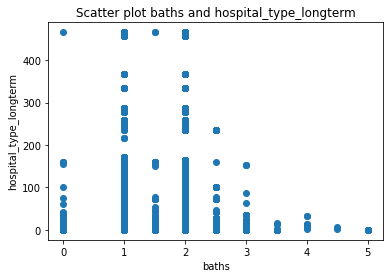

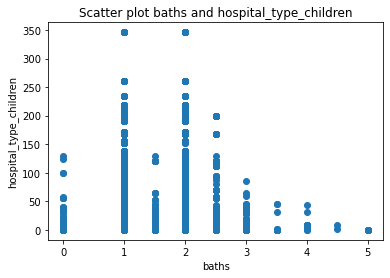

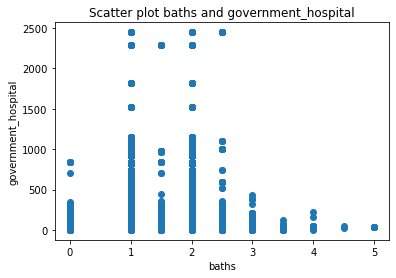

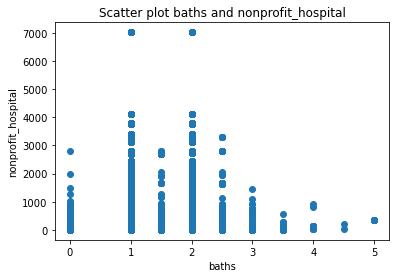

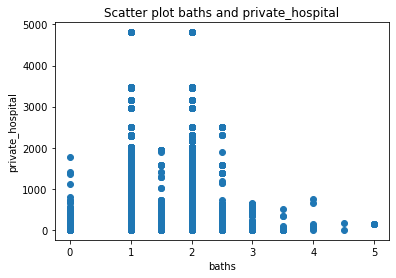

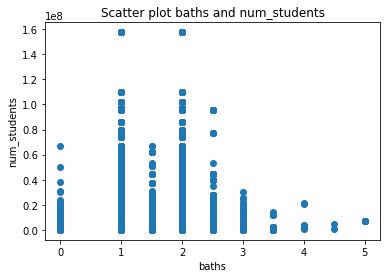

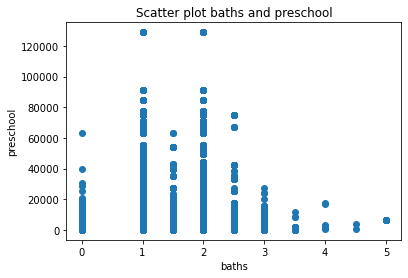

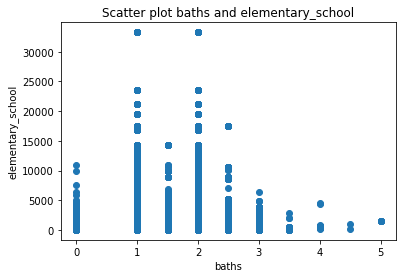

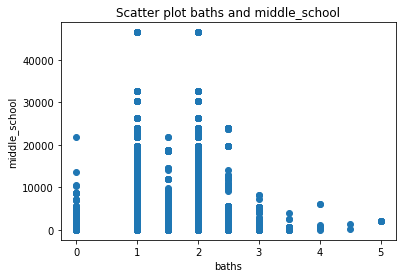

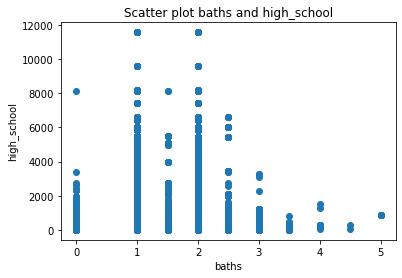

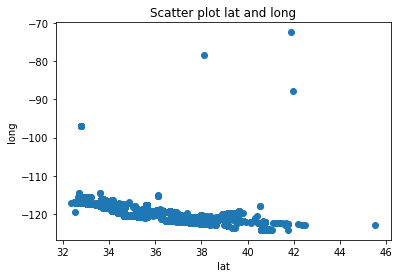

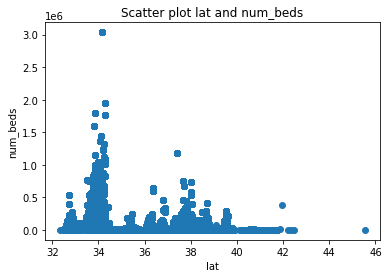

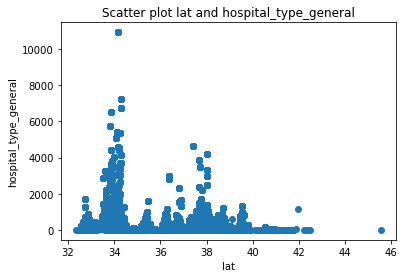

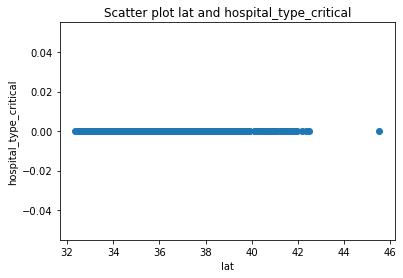

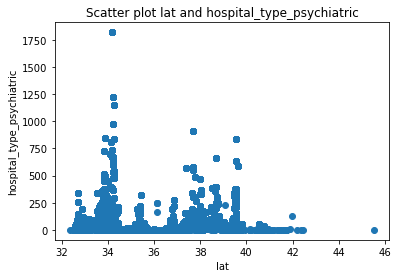

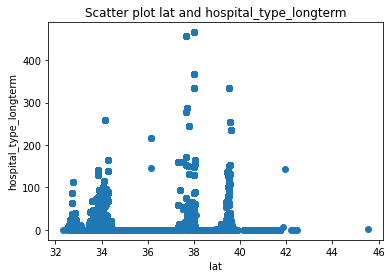

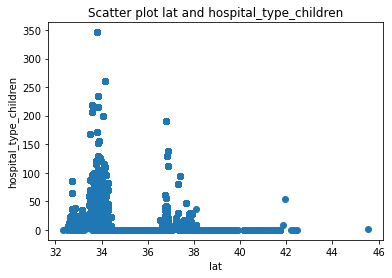

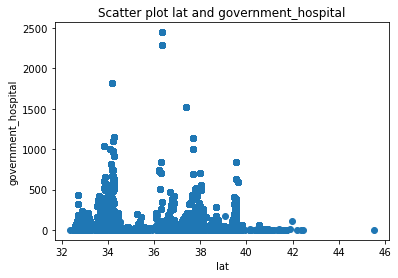

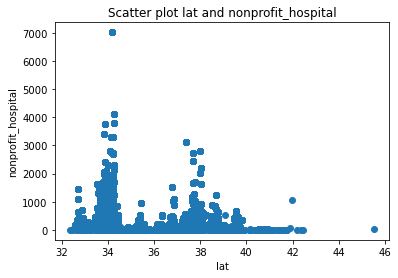

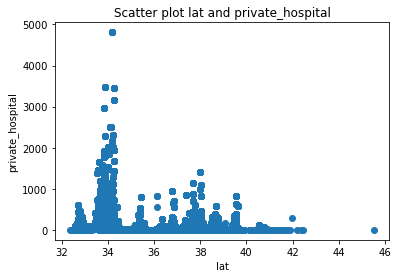

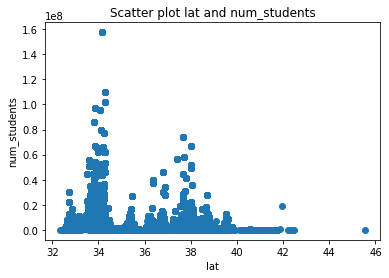

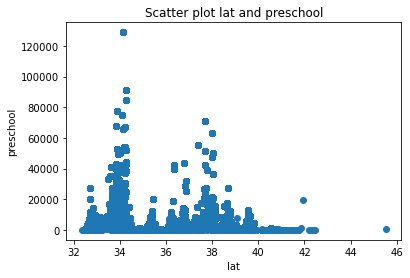

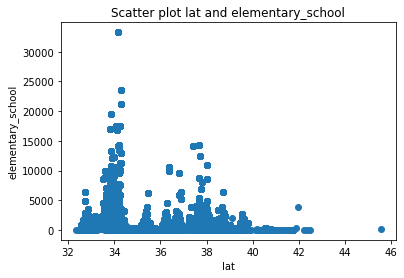

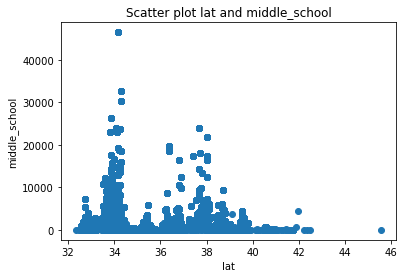

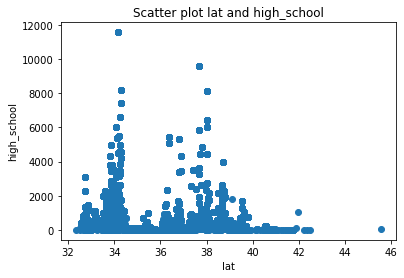

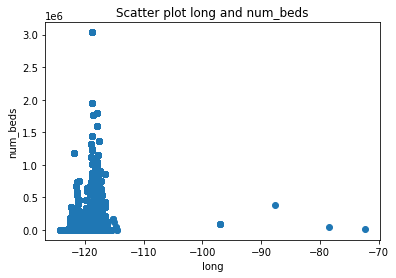

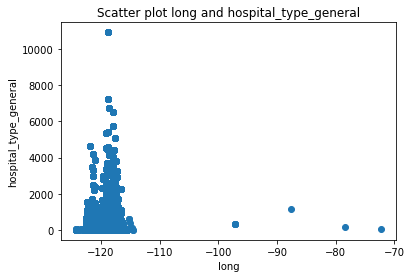

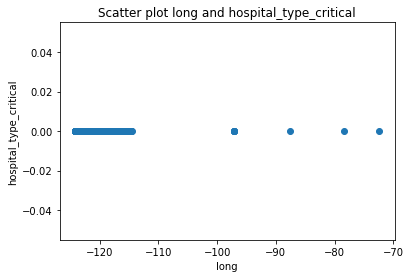

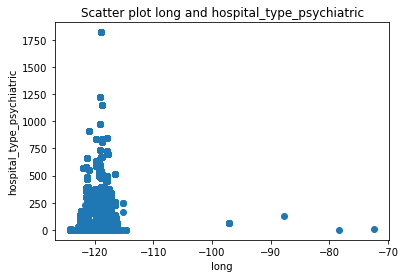

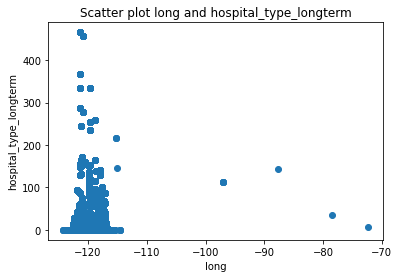

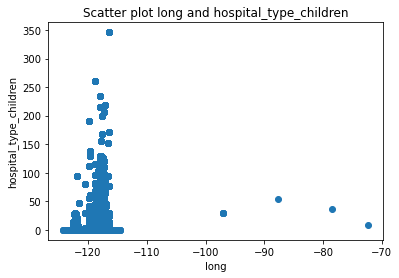

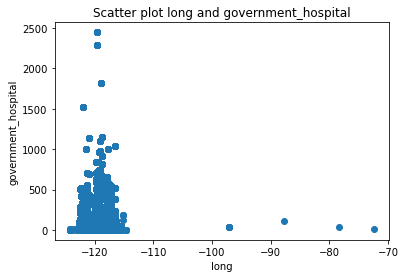

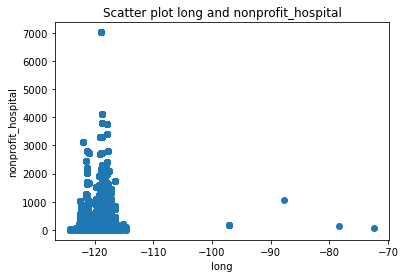

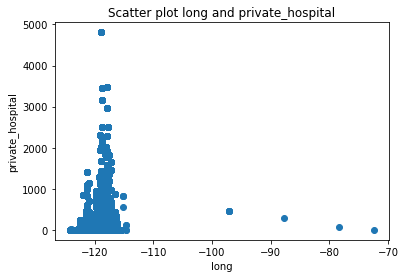

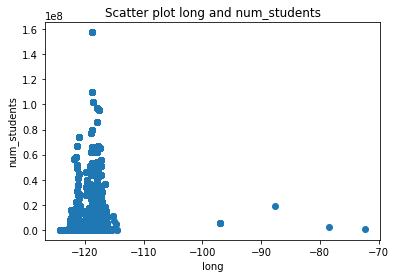

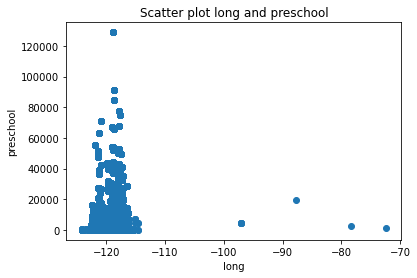

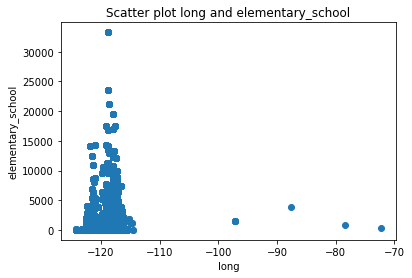

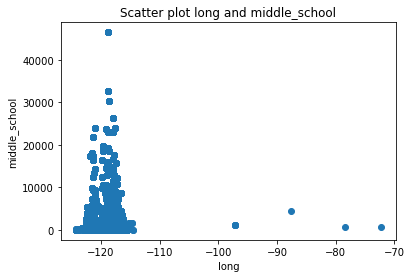

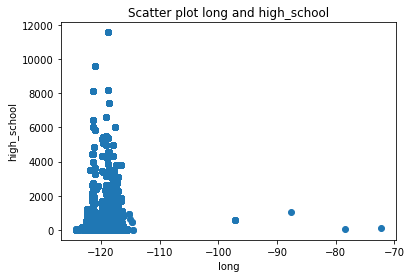

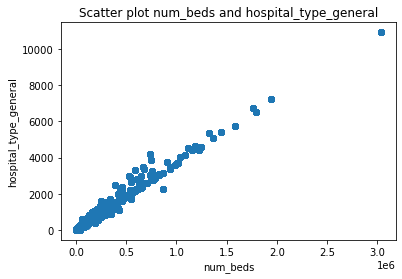

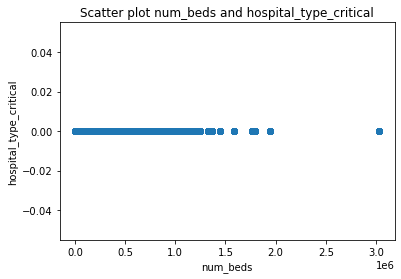

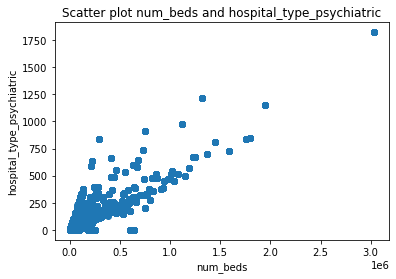

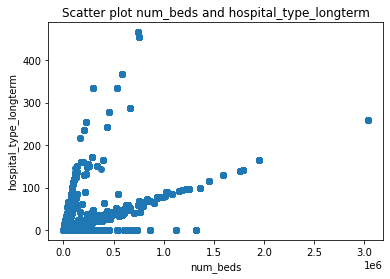

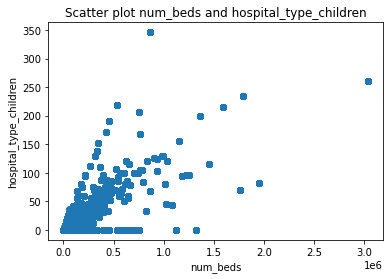

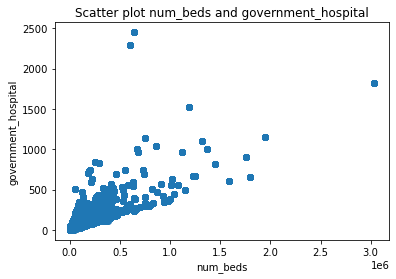

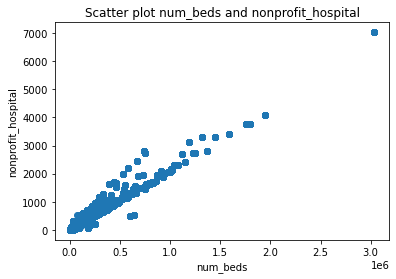

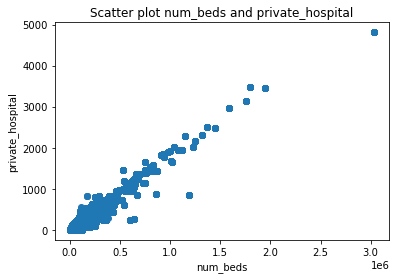

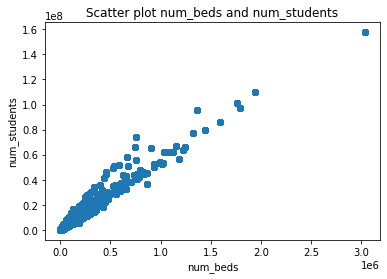

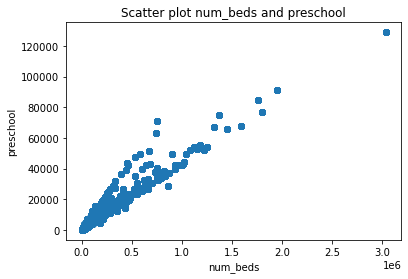

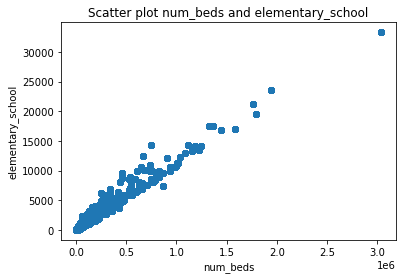

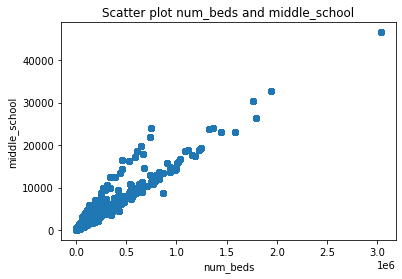

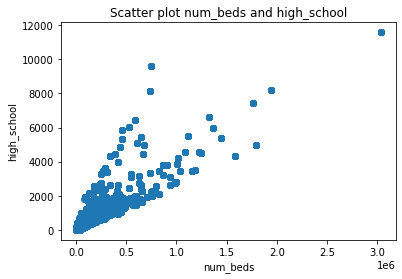

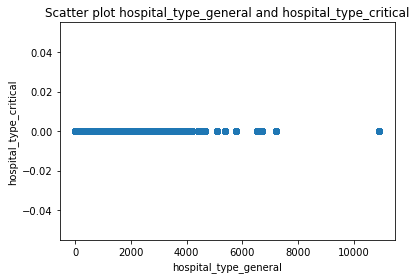

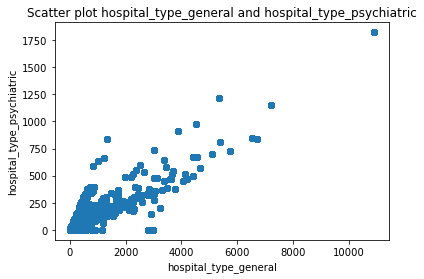

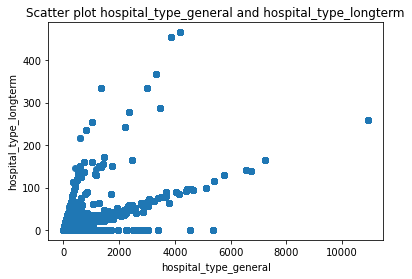

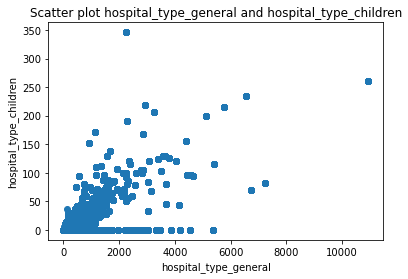

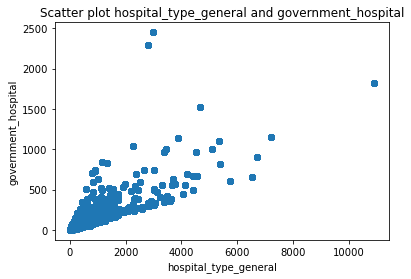

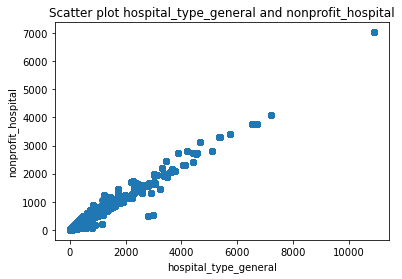

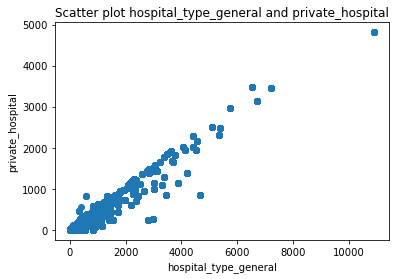

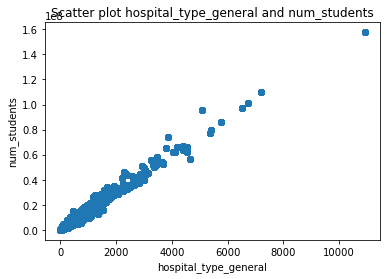

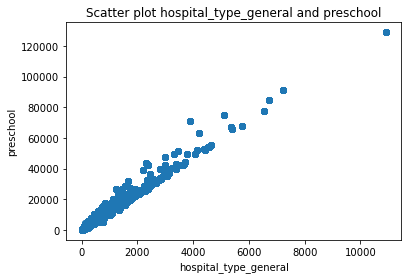

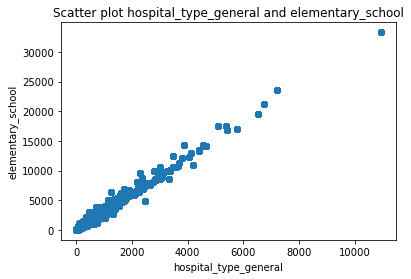

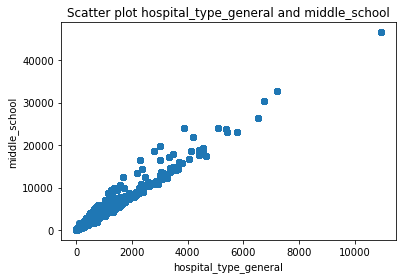

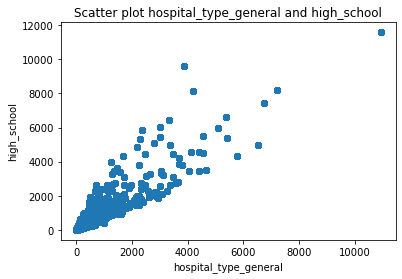

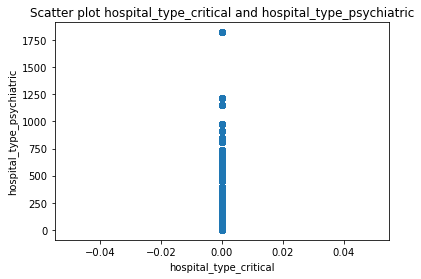

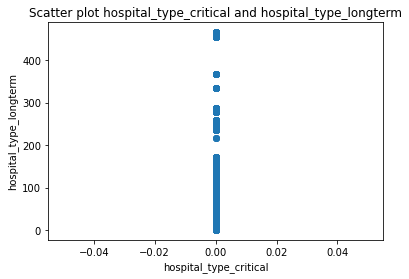

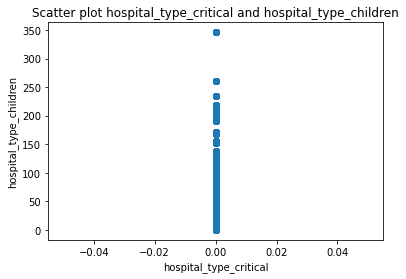

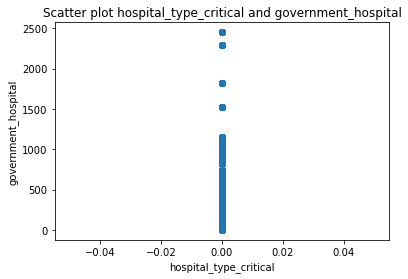

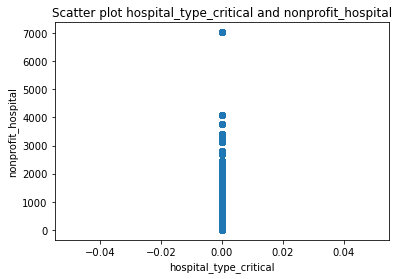

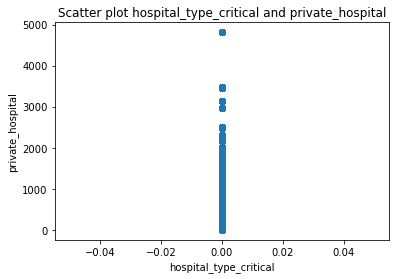

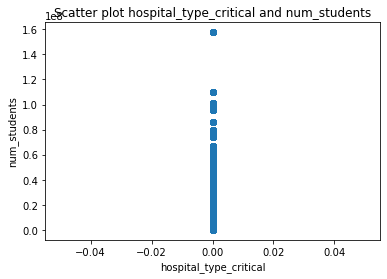

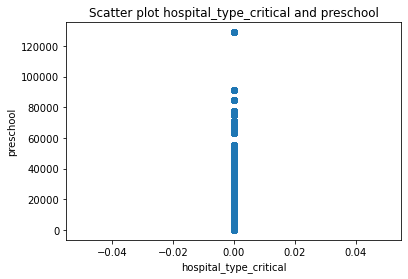

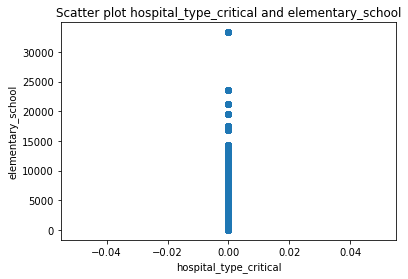

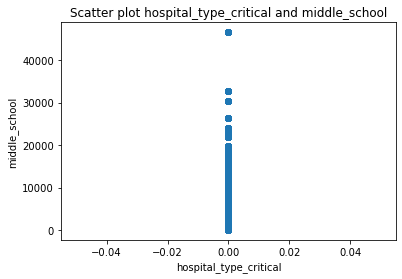

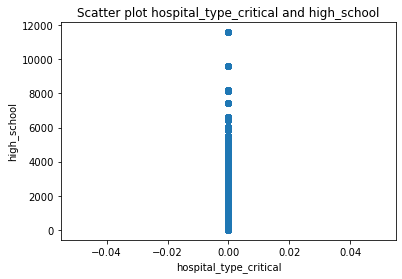

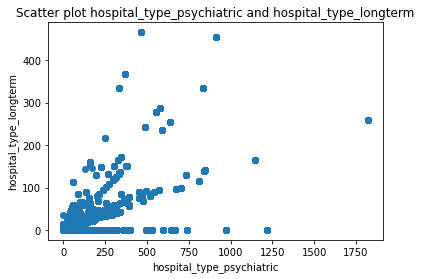

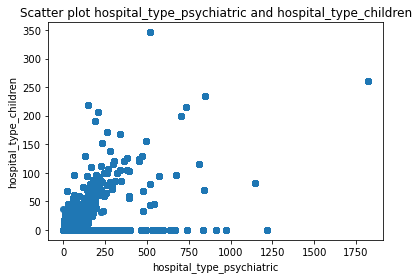

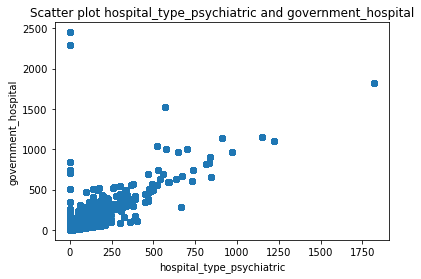

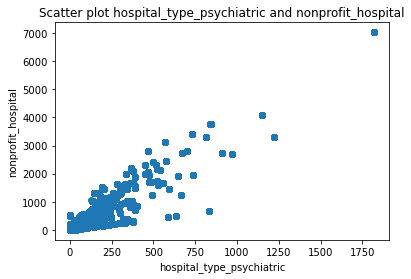

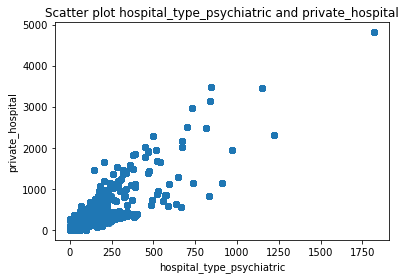

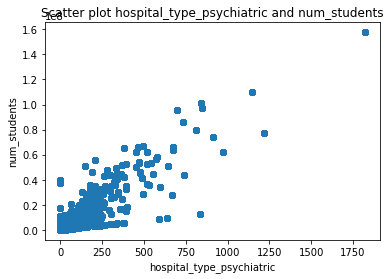

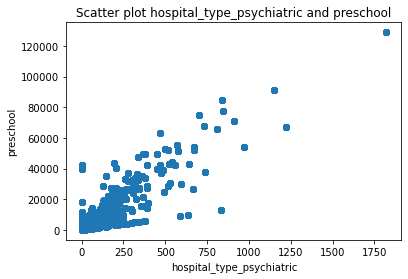

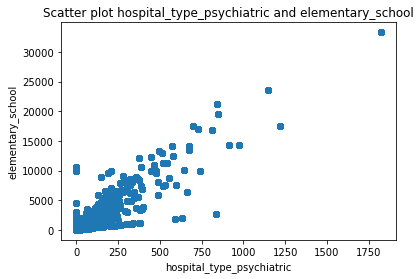

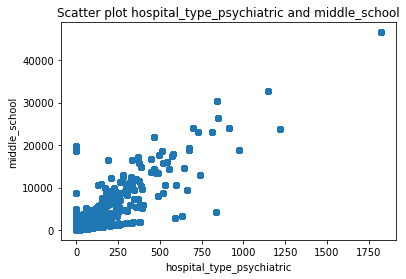

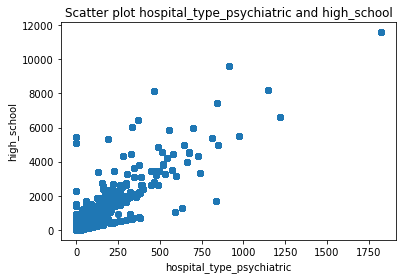

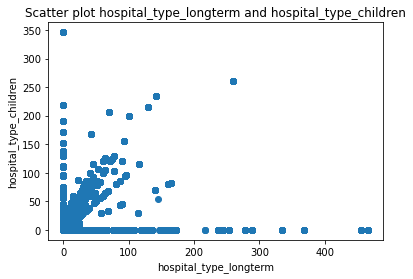

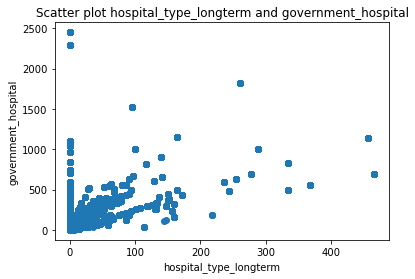

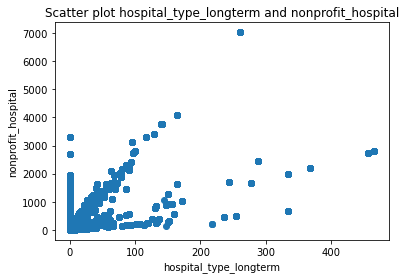

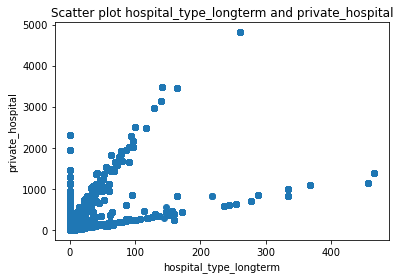

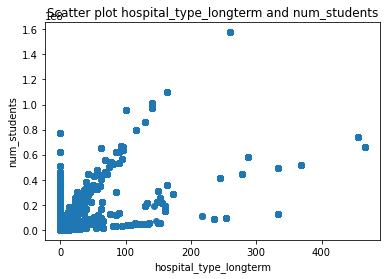

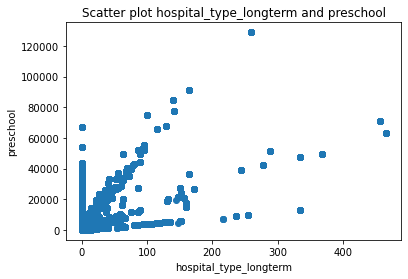

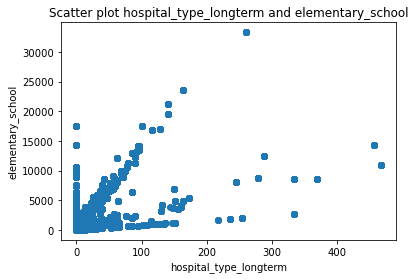

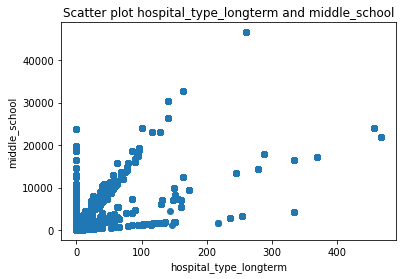

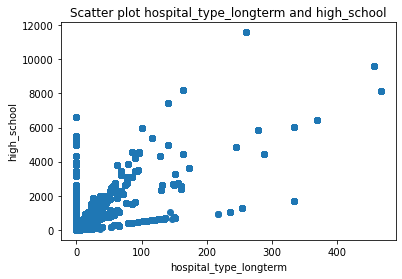

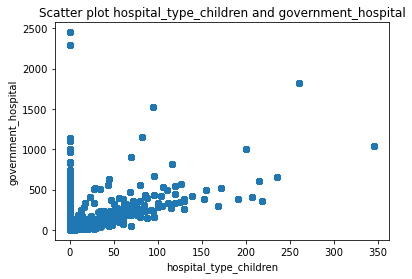

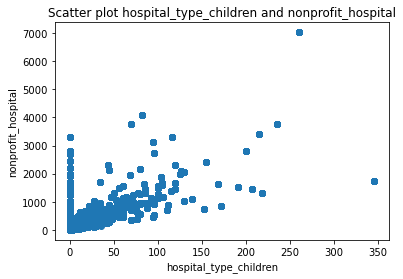

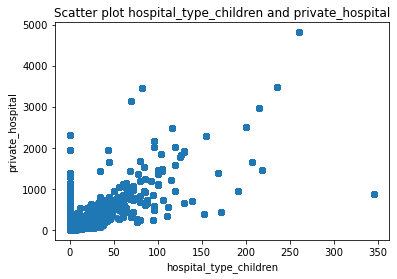

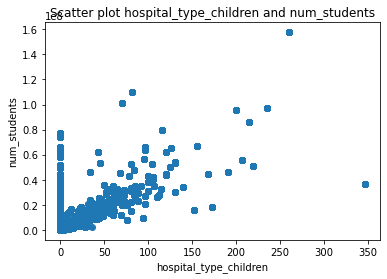

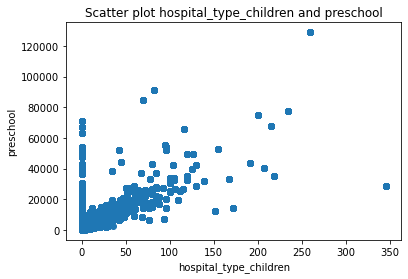

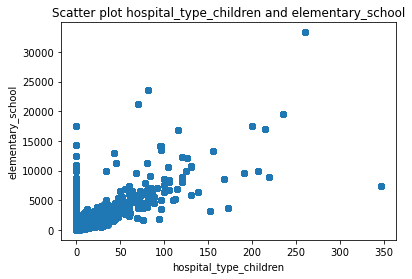

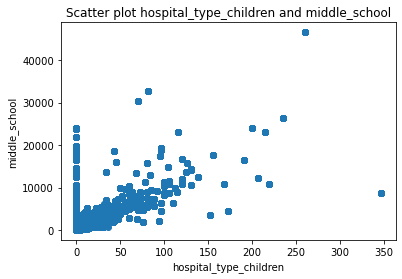

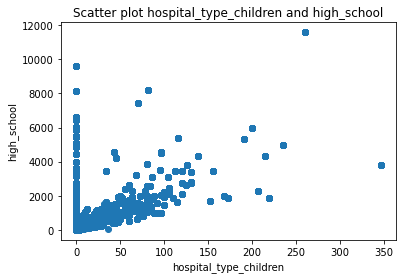

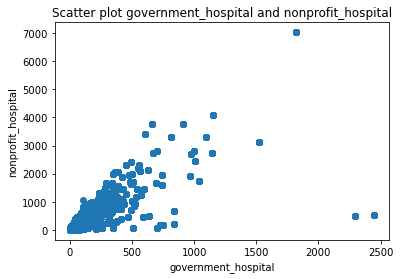

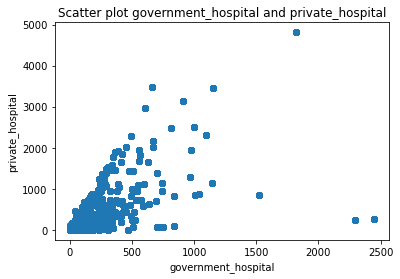

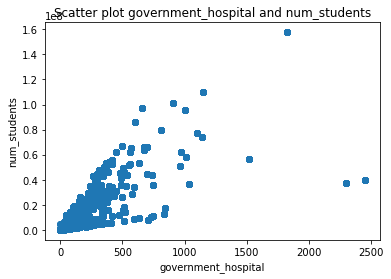

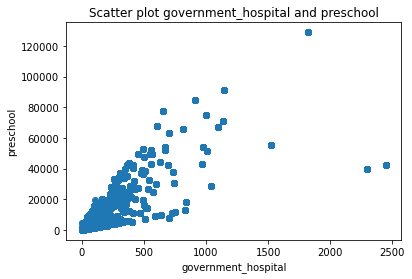

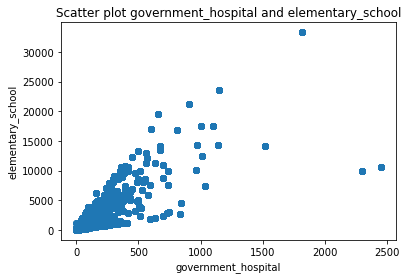

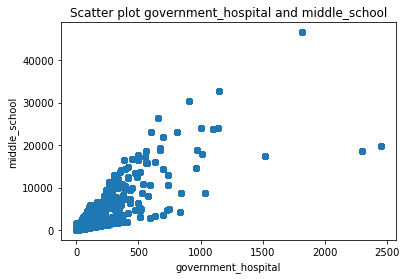

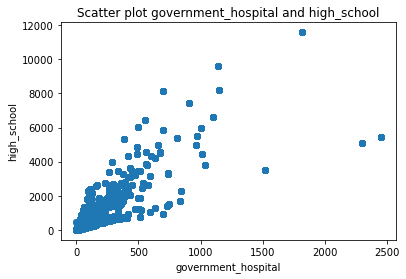

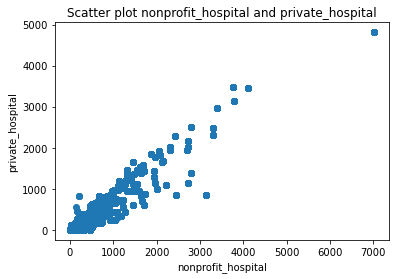

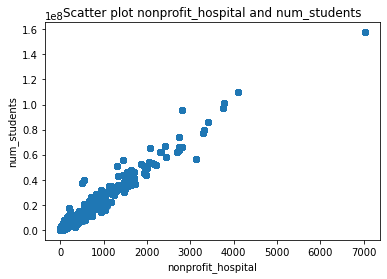

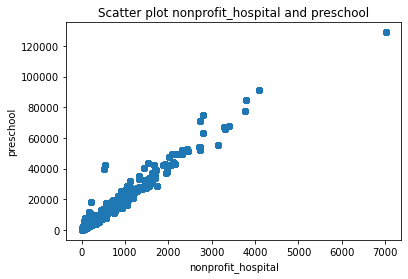

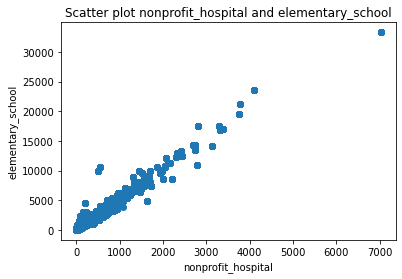

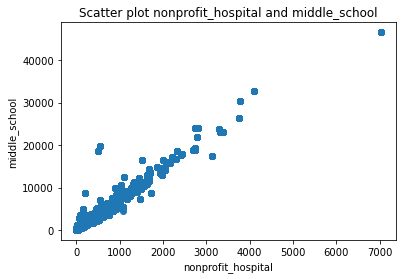

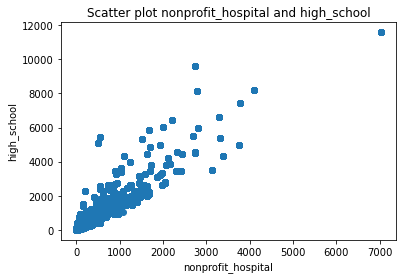

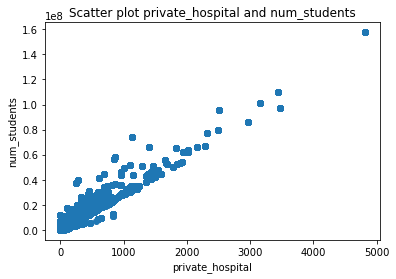

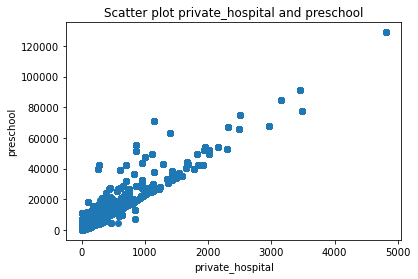

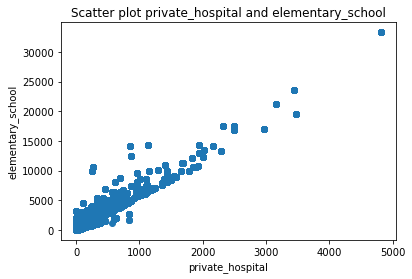

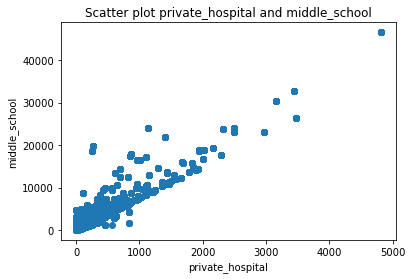

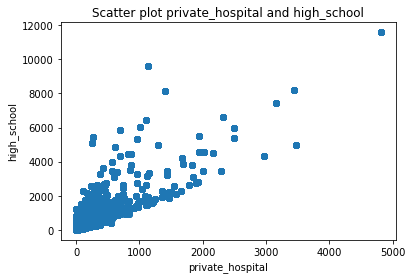

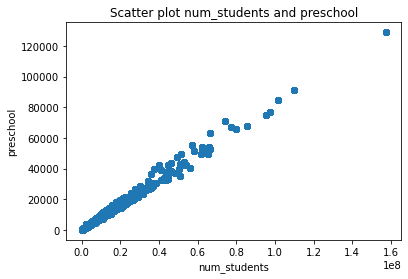

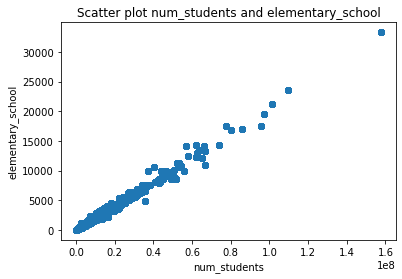

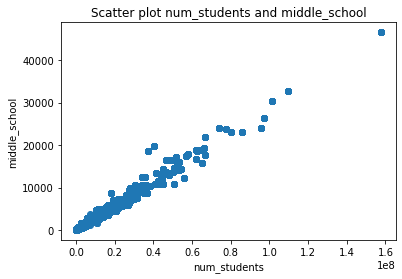

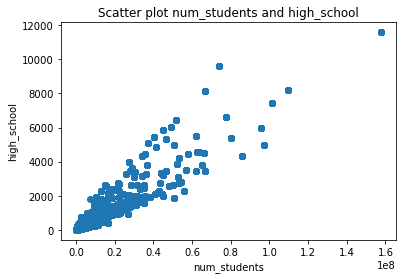

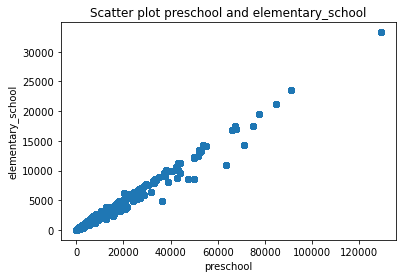

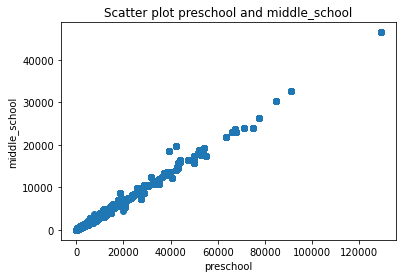

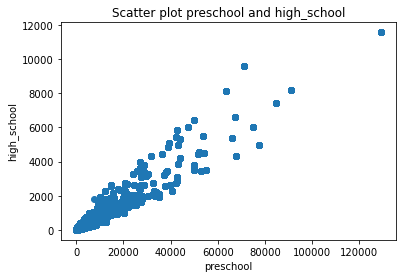

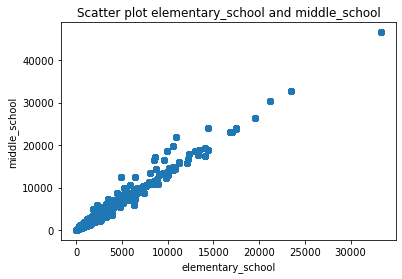

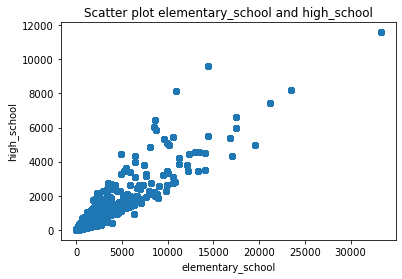

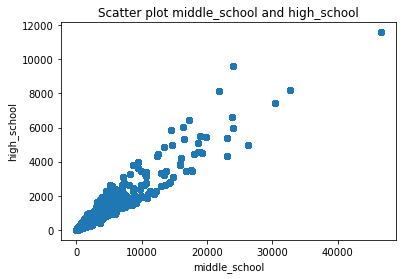

In [21]:
scatter(df)

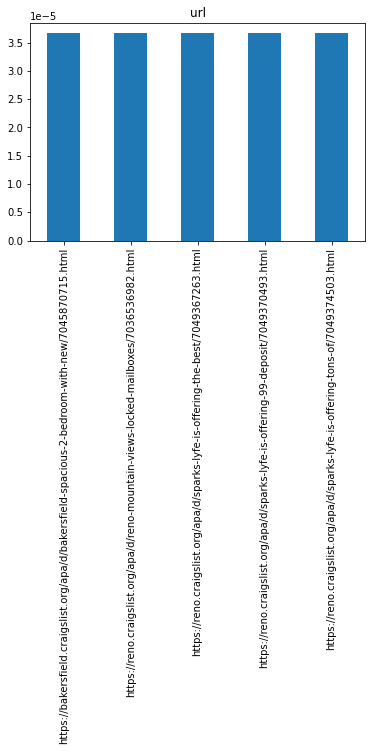

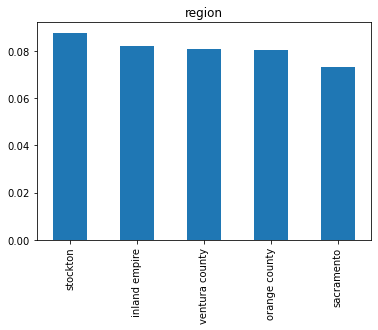

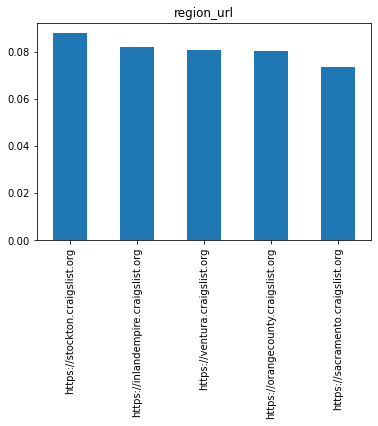

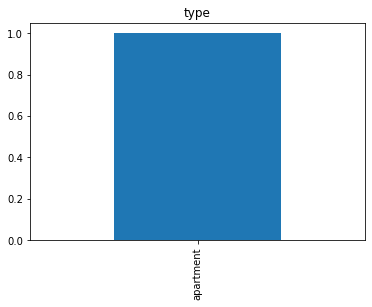

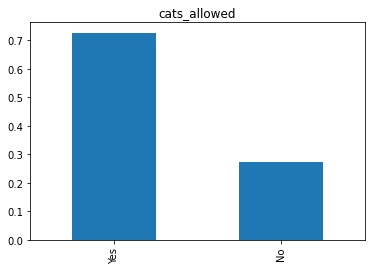

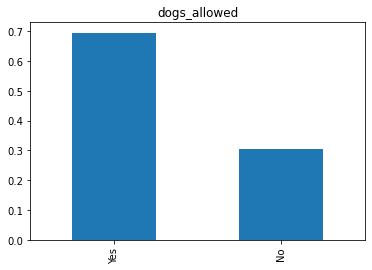

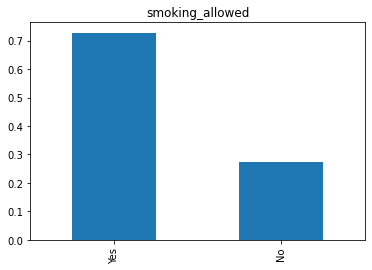

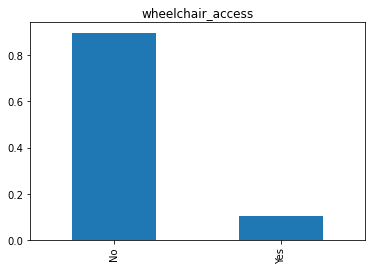

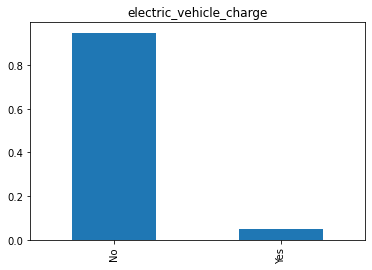

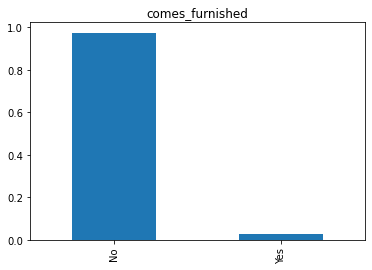

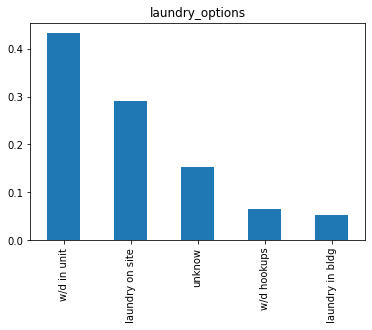

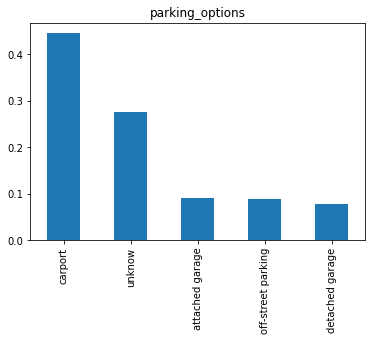

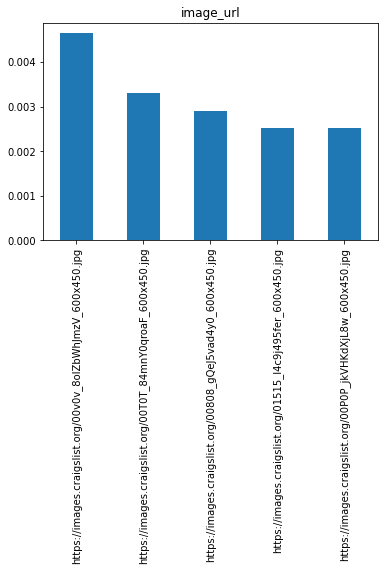

/home/eloi/anaconda3/envs/ADSDB/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/eloi/anaconda3/envs/ADSDB/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/eloi/anaconda3/envs/ADSDB/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


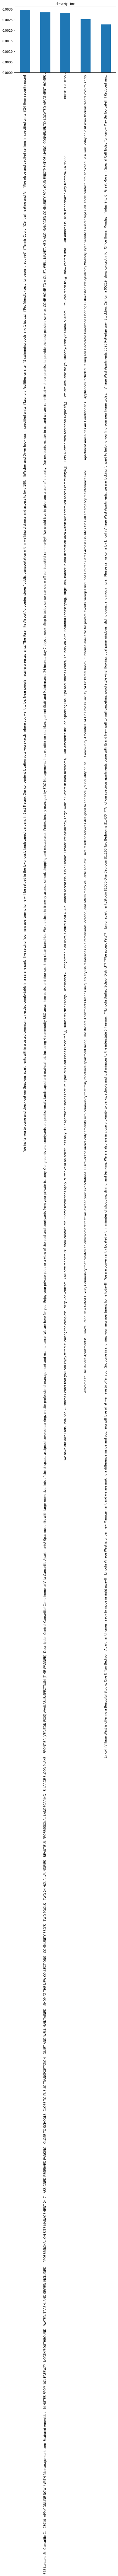

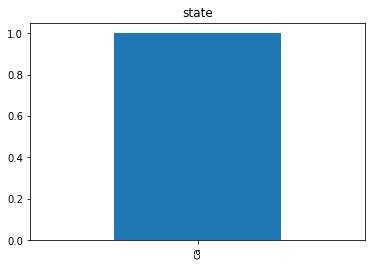

In [22]:
barplot(df,top=5,freq=True)